# Análisis exploratorio hotel booking demand

In [80]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
datos = pd.read_csv('Antonio_2019_Kaggle_hotel_bookings.csv')

In [6]:
datos.dtypes.head(10)

hotel                        object
is_canceled                   int64
lead_time                     int64
arrival_date_year             int64
arrival_date_month           object
arrival_date_week_number      int64
arrival_date_day_of_month     int64
stays_in_weekend_nights       int64
stays_in_week_nights          int64
adults                        int64
dtype: object

Muchas columnas estan en formato object, tranformamos estás columnas a formato category

In [7]:
def to_category(df,col):
    return df[col].astype('category')
    

In [8]:
columns_object = (datos.select_dtypes(include = 'object')).columns

In [9]:
for col in columns_object:
    datos[col] = to_category(datos,col)

In [10]:
na_number = datos.isna().sum()
na_number[na_number > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [195]:
datos.dtypes.head(10)

hotel                        category
is_canceled                     int64
lead_time                       int64
arrival_date_year               int64
arrival_date_month           category
arrival_date_week_number        int64
arrival_date_day_of_month       int64
stays_in_weekend_nights         int64
stays_in_week_nights            int64
adults                          int64
dtype: object

# Análisis variables categóricas

In [196]:
datos_categoricos = datos.select_dtypes(include ='category')
datos_categoricos.describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [156]:
datos_categoricos.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [176]:
grupo_1 = ['arrival_date_month', 'meal','market_segment',
       'distribution_channel', 'reserved_room_type','assigned_room_type',
        'customer_type','reservation_status','deposit_type']

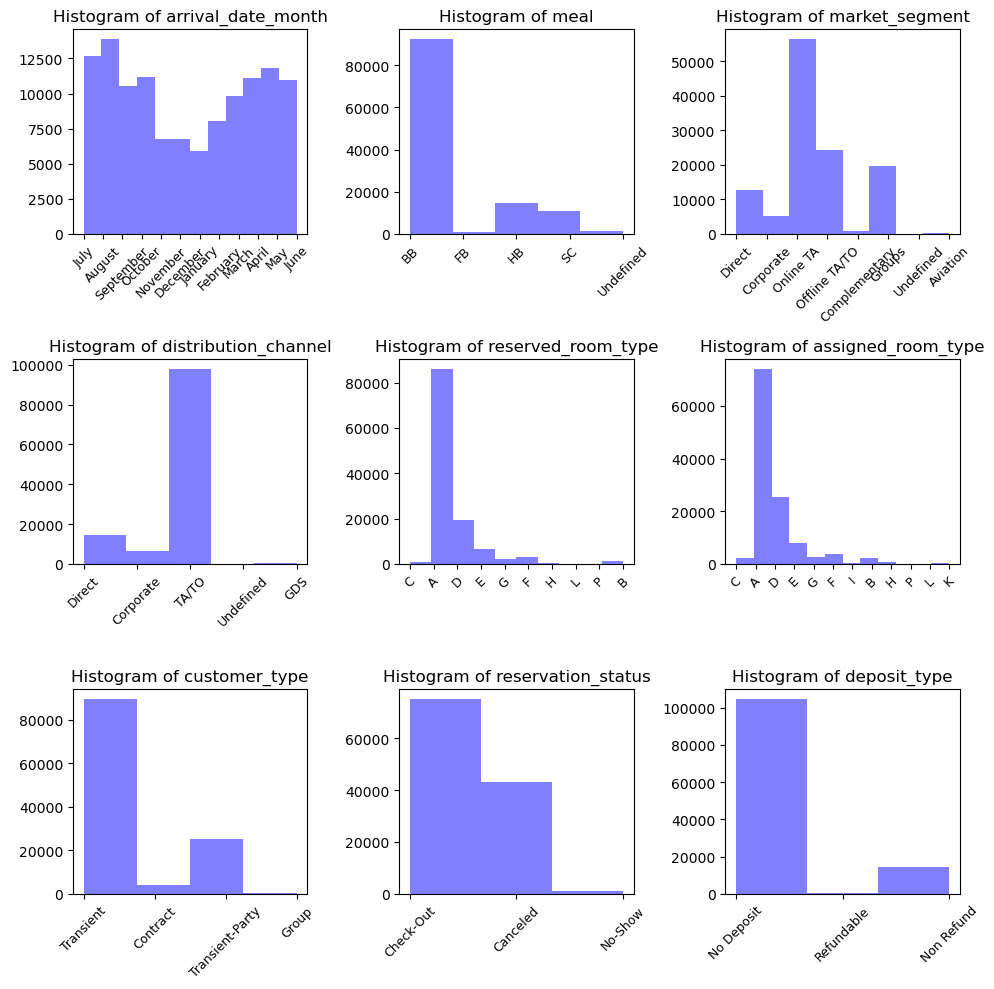

In [178]:
fig, axes = plt.subplots(3,3, figsize = (10,10))


axes = axes.flatten()


for i, col in enumerate(grupo_1):
    axes[i].hist(datos_categoricos[col], bins = len(datos_categoricos[col].unique()), alpha = 0.5, color = "blue")
    axes[i].set_title(f'Histogram of {col}')
    axes[i].tick_params(axis='x', labelsize=9, rotation=45) 
    
    

plt.tight_layout()


plt.show()


Seria interesante ver los resultados desagregados por tipo de hotel

## Análisis variables numéricas (Categoricas igualmente)

In [183]:
datos_numericos = datos.select_dtypes(exclude = ['category'])
datos_numericos.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [184]:
datos_numericos.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [188]:
grupo_3 = ['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children'
       ]

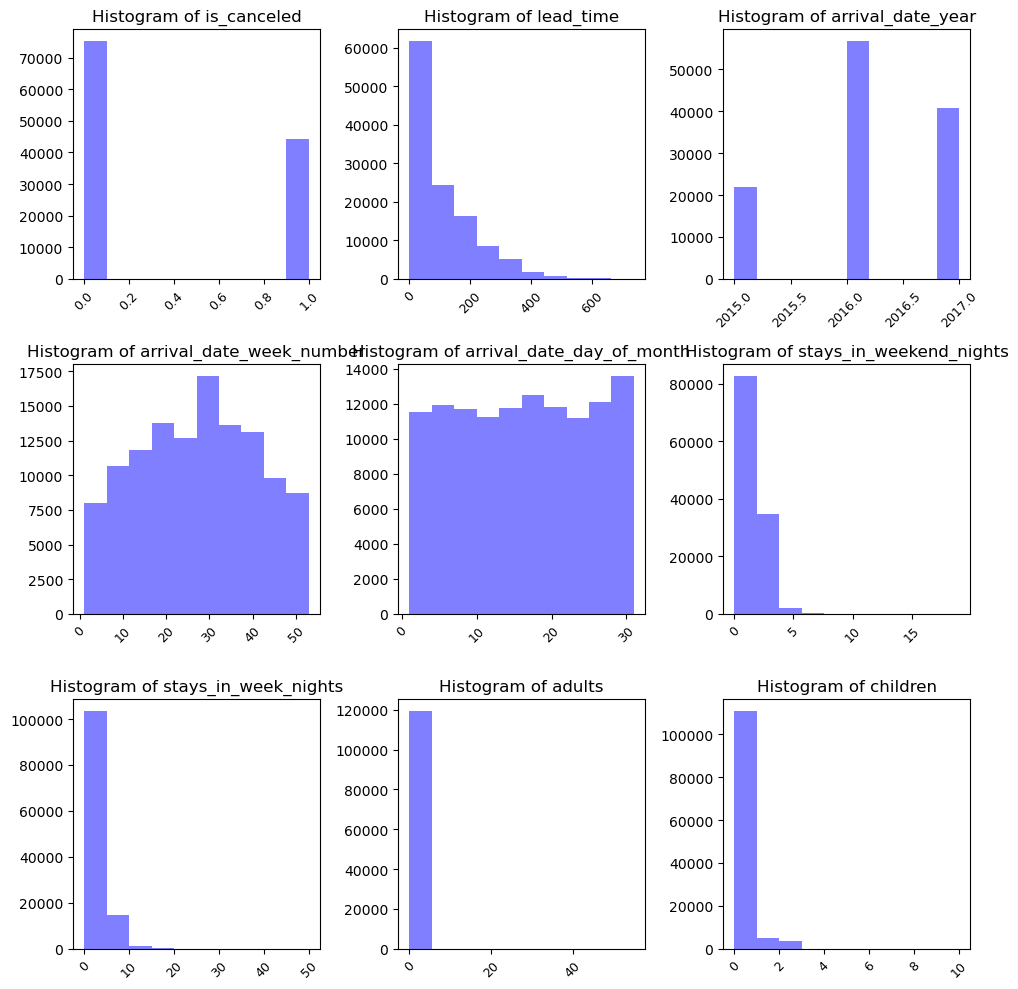

In [200]:
fig, axes = plt.subplots(3,3, figsize = (10,10))


axes = axes.flatten()


for i, col in enumerate(grupo_3):
    axes[i].hist(datos_numericos[col], bins = 10, alpha = 0.5, color = "blue")
    axes[i].set_title(f'Histogram of {col}')
    axes[i].tick_params(axis='x', labelsize=9, rotation=45) 
    
    

plt.tight_layout()


plt.show()


In [193]:
grupo_4 = ['babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list','required_car_parking_spaces']


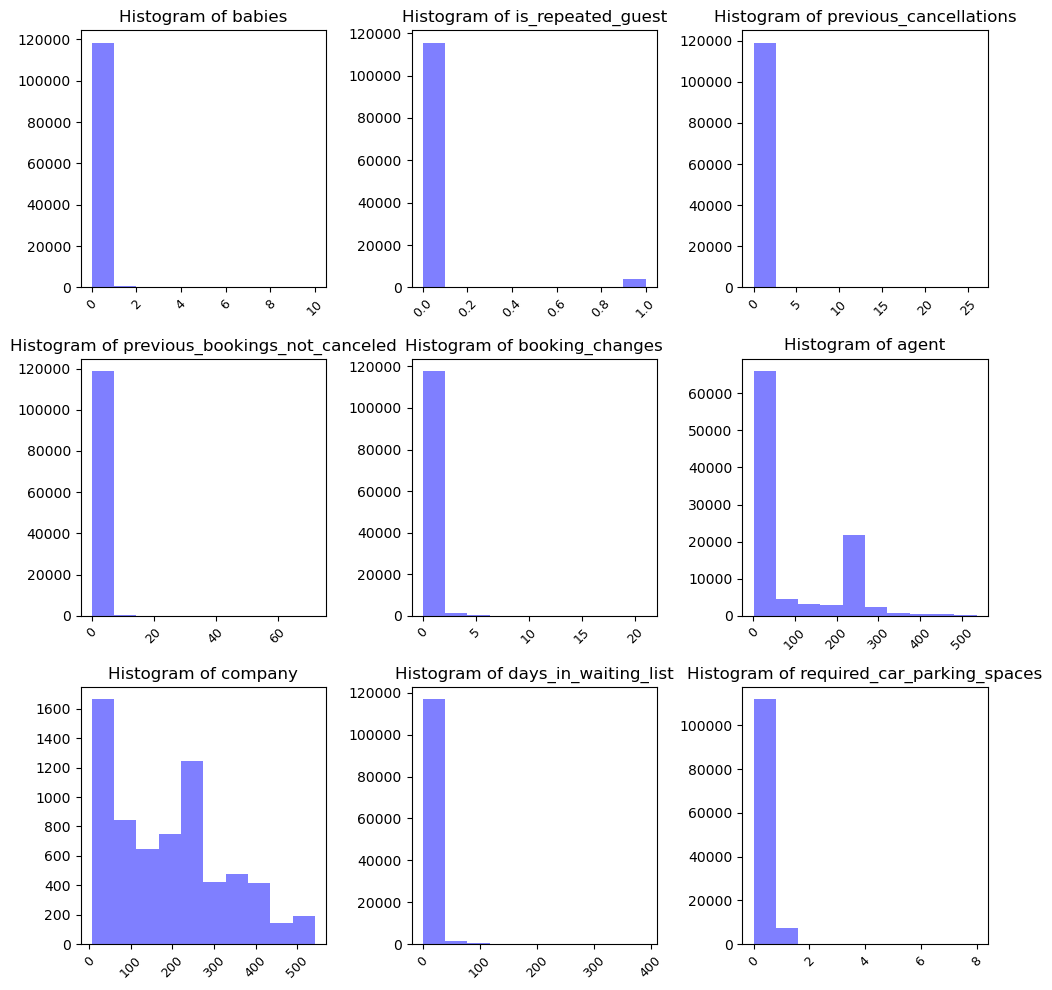

In [202]:
fig, axes = plt.subplots(3,3, figsize = (10,10))


axes = axes.flatten()


for i, col in enumerate(grupo_4):
    axes[i].hist(datos_numericos[col], bins = 10, alpha = 0.5, color = "blue")
    axes[i].set_title(f'Histogram of {col}')
    axes[i].tick_params(axis='x', labelsize=9, rotation=45) 
    
    

plt.tight_layout()


plt.show()

## Analizar la distribución de las variables

In [186]:
datos_numericos['days_in_waiting_list'].value_counts()

days_in_waiting_list
0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: count, Length: 128, dtype: int64

In [134]:
for variable in datos_numericos:
    print(datos_numericos[variable].value_counts())

is_canceled
0    75166
1    44224
Name: count, dtype: int64
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64
arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64
arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: count, dtype: int64
arrival_date_day_of_month
17    4406
5 

In [ ]:
datos_numericos['days_in_waiting_list'].value_counts()

<Axes: >

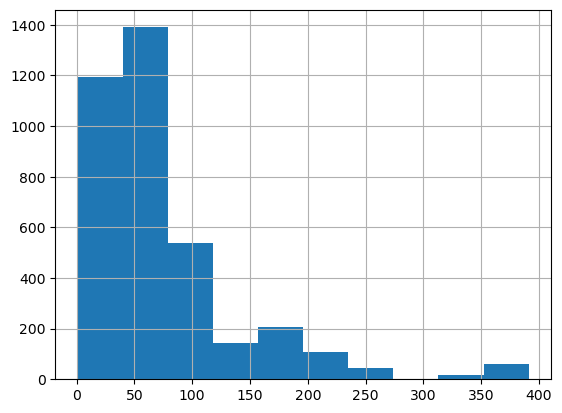

In [130]:
datos_numericos.query('days_in_waiting_list > 0').days_in_waiting_list.hist()

<Axes: xlabel='days_in_waiting_list', ylabel='Count'>

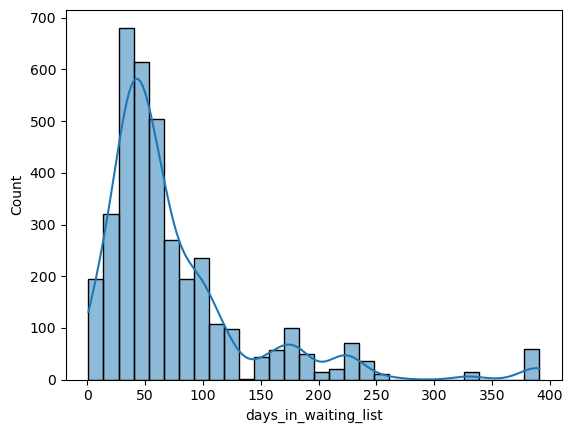

In [132]:
sns.histplot(datos_numericos.query('days_in_waiting_list > 0').days_in_waiting_list, bins = 30, kde = True)